In [1]:
from service_loader import sys_append_abs, Path
sys_append_abs()
from detection.services.service import get_image, visualize_bbox, convertFromJson, convertToXYmax

In [2]:
import os
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
ROOT = Path('__file__').resolve().parents[2]

In [4]:
content_path = glob.glob(os.path.join(ROOT, 'data/content/*'))
content_path

['/root/workspace/work/Digital-Tashkent/Signs/data/content/23.06.2022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/6 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/27062022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/3',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/19.07.2022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/15082022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/7 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/05.07-22.08',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/5 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/13082022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/1',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/2',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/30.06.2022',
 '/root

In [5]:
list_train = glob.glob(os.path.join(ROOT, 'data/content/*/*.csv'))
list_train

['/root/workspace/work/Digital-Tashkent/Signs/data/content/23.06.2022/23.06.2022 tr_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/6 Otabek 06.21/Example_Project_Attributes_included_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/27062022/27062022_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full/28062022 from 00010F_4 .csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full/28062022 to 00010F_4.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/3/khakimov- sign project 3_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/19.07.2022/19_07_22_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/15082022/15.08.2022 full_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/7 Otabek 06.21/Example_Project_Attributes_included_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/05.07-22.08/05.07.2022 (full)_csv.

In [6]:
# def splitter(item):
#     return item.split(':')[-1].split('}')[0]
# df = pd.read_csv(list_train[-1])
# df.reset_index(inplace=True)
# df.drop(['level_1', 'level_2', 'level_3', 'level_4', 'filename'], inplace=True, axis=1)
# df.columns = ['filename', 'x', 'y', 'width', 'height', 'Name', 'Type']
# for col in df.columns:
#     df[col] = df[col].apply(splitter)
# data = convertToXYmax(data)
# df.to_csv(list_train[-1])

In [7]:
def get_image_name(item):
    return item['image'].split('/')[-2] + '____' +  item['image'].split('/')[-1].split('.')[0]

def get_bbox(data):
    bbox_1 = data['xmin'], data['ymin'], data['xmax'], data['ymax']
    return bbox_1

def get_crop(img, bbox):
    return img[bbox[1]:bbox[3], bbox[0]:bbox[2]]

def wrapper(pth):
    def root2path(item):
        return os.path.join(pth, item)
    return root2path

def joiner(csv_item):
    data = pd.read_csv(csv_item)
    pth = '/'.join(csv_item.split('/')[:-1])
    if 'xmin' not in data.columns:
        data = convertFromJson(data)
        data = convertToXYmax(data)
    data['image'] = data['image'].apply(wrapper(pth))
    return data

/root/workspace/work/Digital-Tashkent/Signs/data/content/13082022/13.08.2022 full_csv.csv
Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


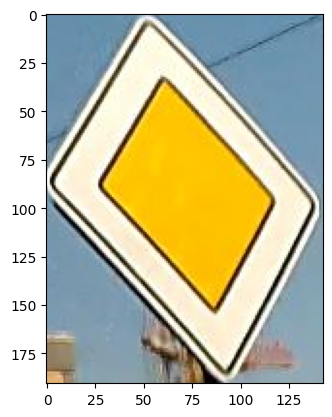

In [8]:
# 18 trash file
index = 13
index2 = 400
print(list_train[index])
data = joiner(list_train[index])
im, bbox = get_image(data, index2)
bbox = list(map(int, bbox))
plt.imshow(get_crop(im, bbox))

In [9]:
for item in list_train:
    data = joiner(item)
    data.dropna(inplace=True)
    for index in range(len(data)):
        
        series = data.iloc[index]
        cls_ = series['name'].replace(' ', '')
        im, bbox = get_image(data, index)
        bbox = list(map(int, bbox))
        im = get_crop(im, bbox)
        image_pth = get_image_name(series)
        pth = f"data/signs/{cls_}"
        Path(pth).mkdir(parents=True, exist_ok=True)
        cv2.imwrite(pth + f'/{image_pth}_{index}.jpg', im)
        # break
    # break


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


Index(['name', 'x', 'y', 'width', 'height'], dtype='object')
Index(['Name', 'Type'], dtype='object')


/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:73: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:89: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


In [ ]:
import re

In [ ]:
data_list = []
for item in list_train:
    data = joiner(item)
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)
    data_list.append(data)
    for item in list_train:
        data = joiner(item)
        data.dropna(inplace=True)
        data.drop_duplicates(inplace=True)
        for image in data['image'].unique():
            df = data[data['image'] == image]
            img = cv2.imread(image)
            for index in range(len(df)):

                # name = image + str(index)
                series = df.iloc[index]
                try:
                    cls_ = re.sub('\s+', '', series['name'])
                    cls_ = cls_.split()[0]
                    bbox = get_bbox(series)
                    bbox = list(map(int, bbox))
                    im = get_crop(img, bbox)
                    image_pth = get_image_name(series)
                    pth = f"data/signs/{cls_}"
                    Path(pth).mkdir(parents=True, exist_ok=True)
                    cv2.imwrite(pth + f'/{image_pth}_{index}.jpg', im)

                except:
                    continue
            



/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:82: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detectio

FileNotFoundError: [Errno 2] No such file or directory: '/root/workspace/work/Digital-Tashkent/Signs/data/content/30062022/30.06.22 (113415, 115029, 123930)_csv.csv'

In [ ]:
data_list = []
for item in list_train:
    data = joiner(item)
    data.dropna(inplace=True)
    data.drop_duplicates(inplace=True)
    data.reset_index(drop=True)
    data_list.append(data)

In [ ]:
for image in data['image'].unique():
    df = data[data['image'] == image]
    img = cv2.imread(image)
    for index in range(len(df)):

        # name = image + str(index)
        series = df.iloc[index]
        try:
            cls_ = re.sub('\s+', '', series['name'])
            cls_ = cls_.split()[0]
            bbox = get_bbox(series)
            bbox = list(map(int, bbox))
            im = get_crop(img, bbox)
            image_pth = get_image_name(series)
            pth = f"data/signs/{cls_}"
            Path(pth).mkdir(parents=True, exist_ok=True)
            cv2.imwrite(pth + f'/{image_pth}_{index}.jpg', im)

        except:
            continue

In [ ]:
series

image    /root/workspace/work/Digital-Tashkent/Signs/da...
xmin                                                1676.0
ymin                                                 122.0
xmax                                                1843.0
ymax                                                 252.0
name                                                      
class                                         Warning_sign
Name: 220, dtype: object

In [ ]:
path__ = '/root/workspace/work/Digital-Tashkent/Signs/data/content/30.06.2022/NO20220630-125023-000011F_8.JPG'
ser = data[data['image'] == path__]
ser.head()

,image,xmin,ymin,xmax,ymax,name,class
14,/root/workspace/work/Digital-Tashkent/Signs/da...,2448.0,373.0,2502.0,456.0,3.27,Forbidding_sign
15,/root/workspace/work/Digital-Tashkent/Signs/da...,2479.0,461.0,2512.0,556.0,7.2.4,Additional_info_sign
16,/root/workspace/work/Digital-Tashkent/Signs/da...,2324.0,570.0,2375.0,629.0,5.16.2,Informational_sign
17,/root/workspace/work/Digital-Tashkent/Signs/da...,1792.0,627.0,1833.0,672.0,3.27,Forbidding_sign
18,/root/workspace/work/Digital-Tashkent/Signs/da...,1803.0,677.0,1831.0,715.0,7.2.4,Additional_info_sign


In [ ]:
for i in range(len(ser)):
    print(get_bbox(ser.iloc[i]))

(2448.0, 373.0, 2502.0, 456.0)
(2479.0, 461.0, 2512.0, 556.0)
(2324.0, 570.0, 2375.0, 629.0)
(1792.0, 627.0, 1833.0, 672.0)
(1803.0, 677.0, 1831.0, 715.0)
(1675.0, 567.0, 1735.0, 623.0)


In [ ]:
data

,image,xmin,ymin,xmax,ymax,name,class
0,/root/workspace/work/Digital-Tashkent/Signs/da...,1847.0,546.0,1906.0,608.0,5.17.1,Informational_sign
1,/root/workspace/work/Digital-Tashkent/Signs/da...,1718.0,597.0,1776.0,661.0,3.27,Forbidding_sign
2,/root/workspace/work/Digital-Tashkent/Signs/da...,1717.0,659.0,1783.0,696.0,7.21,Additional_info_sign
3,/root/workspace/work/Digital-Tashkent/Signs/da...,2086.0,509.0,2177.0,622.0,3.27,Forbidding_sign
4,/root/workspace/work/Digital-Tashkent/Signs/da...,2089.0,618.0,2190.0,685.0,7.21,Additional_info_sign
...,...,...,...,...,...,...,...
413,/root/workspace/work/Digital-Tashkent/Signs/da...,NaN,NaN,NaN,NaN,nan,NaN
414,/root/workspace/work/Digital-Tashkent/Signs/da...,NaN,NaN,NaN,NaN,nan,NaN
415,/root/workspace/work/Digital-Tashkent/Signs/da...,NaN,NaN,NaN,NaN,nan,NaN
416,/root/workspace/work/Digital-Tashkent/Signs/da...,NaN,NaN,NaN,NaN,nan,NaN
